<a href="https://colab.research.google.com/github/acgowda/market-flow/blob/main/model/model_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [22]:
# df = pd.read_csv('/content/drive/Shareddrives/PIC 16B Project/stock_data3.csv')
df = pd.read_csv('/content/drive/Shareddrives/PIC 16B Project/weekly_stock_data4.csv')
df.head()

,Date,open,high,low,close,volume,ma4,ma21,ma52,^GSPC-close,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,2020-05-11,-0.046358,-0.086602,-0.144796,1.0,0.833677,-0.020976,-0.041928,-0.016598,-0.022561,...,0,0,0,0,0,1,0,0,0,0
1,2020-03-02,-0.081929,-0.023429,0.042318,0.0,0.169067,-0.008085,0.010951,0.008829,0.006144,...,0,0,0,1,0,0,0,0,0,0
2,2022-02-07,0.057884,0.044082,0.060046,0.0,-0.039859,-0.021680,0.006230,0.004645,-0.018196,...,0,0,1,0,0,0,0,0,0,0
3,2022-03-28,0.014184,0.043588,0.015635,0.0,-0.003532,0.021874,-0.016288,-0.003028,0.000616,...,0,0,0,1,0,0,0,0,0,0
4,2020-07-20,0.040920,0.011185,0.048317,0.0,-0.169984,-0.011515,-0.006362,-0.007315,-0.002822,...,0,0,0,0,0,0,0,1,0,0


In [23]:
df.columns

Index(['Date', 'open', 'high', 'low', 'close', 'volume', 'ma4', 'ma21', 'ma52',
       '^GSPC-close', '^GSPC-volume', '^GSPC-ma4', '^GSPC-ma21', '^GSPC-ma52',
       '^VIX-close', '^VIX-ma4', '^VIX-ma21', '^VIX-ma52', '^IXIC-close',
       '^IXIC-volume', '^IXIC-ma4', '^IXIC-ma21', '^IXIC-ma52', '^DJI-close',
       '^DJI-volume', '^DJI-ma4', '^DJI-ma21', '^DJI-ma52', '^HSI-close',
       '^HSI-volume', '^HSI-ma4', '^HSI-ma21', '^HSI-ma52', '^FTSE-close',
       '^FTSE-volume', '^FTSE-ma4', '^FTSE-ma21', '^FTSE-ma52', '^FCHI-close',
       '^FCHI-volume', '^FCHI-ma4', '^FCHI-ma21', '^FCHI-ma52', 'GC=F-close',
       'GC=F-volume', 'GC=F-ma4', 'GC=F-ma21', 'GC=F-ma52', 'CL=F-close',
       'CL=F-volume', 'CL=F-ma4', 'CL=F-ma21', 'CL=F-ma52', 'month_1',
       'month_10', 'month_11', 'month_12', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9'],
      dtype='object')

In [33]:
high_change_cols = list(df.describe().loc['max'][df.describe().loc['max'] > 10].index)
high_change_cols

['volume', 'GC=F-volume']

In [24]:
df = df.drop(['Date'], axis = 1)

In [34]:
df2 = df.drop(high_change_cols, axis = 1)

In [35]:
df2.shape

(93212, 62)

In [36]:
X = df2.drop(columns=['close'])
y = df2['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [37]:
model2 = tf.keras.models.Sequential([
    layers.Dense(128, input_shape=(61,), activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(2)
])

In [38]:
model2.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, epochs=30, batch_size = 64, 
                    shuffle = True, verbose=1)

Epoch 1/30
1020/1020 [==============================] - 3s 3ms/step - loss: 0.6382 - accuracy: 0.6266
Epoch 2/30
1020/1020 [==============================] - 3s 3ms/step - loss: 0.5930 - accuracy: 0.6763
Epoch 3/30
1020/1020 [==============================] - 3s 3ms/step - loss: 0.5804 - accuracy: 0.6852
Epoch 4/30
1020/1020 [==============================] - 3s 3ms/step - loss: 0.5767 - accuracy: 0.6895
Epoch 5/30
1020/1020 [==============================] - 3s 3ms/step - loss: 0.5726 - accuracy: 0.6916
Epoch 6/30
1020/1020 [==============================] - 3s 3ms/step - loss: 0.5701 - accuracy: 0.6953
Epoch 7/30
1020/1020 [==============================] - 3s 3ms/step - loss: 0.5673 - accuracy: 0.6953
Epoch 8/30
1020/1020 [==============================] - 3s 3ms/step - loss: 0.5668 - accuracy: 0.6970
Epoch 9/30
1020/1020 [==============================] - 3s 3ms/step - loss: 0.5650 - accuracy: 0.6960
Epoch 10/30
1020/1020 [==============================] - 3s 3ms/step - loss: 0.563

In [40]:
loss, accuracy = model2.evaluate(X_test, y_test)
print('Test accuracy :', accuracy)

874/874 [==============================] - 4s 4ms/step - loss: 0.5442 - accuracy: 0.7142
Test accuracy : 0.7141681909561157


In [ ]:
df2 = pd.read_csv('/content/drive/Shareddrives/PIC 16B Project/test_stocks.csv')
df2.head()

,Date,close,open,high,low,volume,ma5,ma20,ma60,ma200,...,^GSPC-volume,^GSPC-ma5,^GSPC-ma20,^GSPC-ma60,^GSPC-ma200,^VIX-close,^VIX-ma5,^VIX-ma20,^VIX-ma60,^VIX-ma200
0,2021-09-27,0.0,0.559833,0.401174,0.641137,-0.579245,0.458167,-0.052220,-1.046358,0.117847,...,-0.803180,1.687999,1.771267,1.764645,1.567048,-0.016410,0.137693,0.016000,-0.111738,0.158469
1,2021-09-28,0.0,0.427936,0.259966,0.360757,-0.437262,0.450177,-0.012513,-1.022518,0.178964,...,-0.358725,1.687565,1.758907,1.764652,1.572679,0.495866,0.111809,0.059698,-0.092514,0.159132
2,2021-09-29,0.0,0.299649,0.140253,0.341591,-0.712706,0.428906,0.028838,-0.996923,0.252754,...,-1.071015,1.677487,1.747454,1.765034,1.578406,0.417142,0.151218,0.097330,-0.078131,0.158451
3,2021-09-30,1.0,0.193452,0.052171,0.295591,-0.734789,0.345851,0.064119,-0.965703,0.349409,...,-0.715940,1.638088,1.732260,1.763819,1.583836,0.483316,0.256388,0.140842,-0.061821,0.157016
4,2021-10-01,0.0,0.310800,0.241541,0.451114,-0.332236,0.313551,0.114101,-0.926103,0.472845,...,-0.691745,1.610667,1.719636,1.764689,1.589286,0.250567,0.334507,0.169871,-0.056886,0.155390


In [41]:
def plot_history(hist):
    plt.plot(hist.history["accuracy"], label = "training")
    # plt.plot(hist.history["val_accuracy"], label = "validation")
    plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
    plt.legend()
    plt.show()

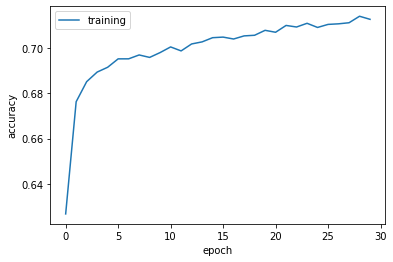

In [42]:
plot_history(history2)

In [43]:
model2.save('/content/drive/Shareddrives/PIC 16B Project/model_week')

INFO:tensorflow:Assets written to: /content/drive/Shareddrives/PIC 16B Project/model_week/assets
